In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

def idec_model(input_shape, n_clusters):
    input_data = Input(shape=(input_shape,))
    encoded = Dense(500, activation='relu')(input_data)
    encoded = Dense(500, activation='relu')(encoded)
    encoded = Dense(2000, activation='relu')(encoded)
    encoded = Dense(10, activation='relu')(encoded)  # 10-dimensional latent space

    decoded = Dense(2000, activation='relu')(encoded)
    decoded = Dense(500, activation='relu')(decoded)
    decoded = Dense(500, activation='relu')(decoded)
    decoded = Dense(input_shape, activation='sigmoid')(decoded)

    autoencoder = Model(input_data, decoded)

    clustering_layer = Dense(n_clusters, activation='softmax')(encoded)

    model = Model(inputs=input_data, outputs=[clustering_layer, autoencoder])
    return model

n_clusters = 10
input_shape = 784
batch_size = 256
epochs = 50
lr = 0.001

model = idec_model(input_shape, n_clusters)

model.compile(optimizer=Adam(lr=lr), loss=['kld', 'mse'], loss_weights=[0.1, 1])
model.fit(x_train, [np.zeros((len(x_train), n_clusters)), x_train], batch_size=batch_size, epochs=epochs)

encoder = Model(inputs=model.input, outputs=model.layers[4].output)
encoded_data = encoder.predict(x_train)

# Apply K-means clustering on the learned features
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoded_data)

scaler = MinMaxScaler()
encoded_data_scaled = scaler.fit_transform(encoded_data)

# Compute clustering performance metrics
print("Clustering Metrics:")
print("Homogeneity Score:", metrics.homogeneity_score(y_train, y_pred))
print("Completeness Score:", metrics.completeness_score(y_train, y_pred))
print("V-measure Score:", metrics.v_measure_score(y_train, y_pred))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_train, y_pred))
print("Normalized Mutual Information Score:", metrics.normalized_mutual_info_score(y_train, y_pred))


2023-07-05 17:32:04.353946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 3s 0us/step


2023-07-05 17:32:10.817741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-05 17:32:10.846595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-05 17:32:10.846806: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

ValueError: Output tensors of a Functional model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: <keras.engine.functional.Functional object at 0x7fe461388ac0>

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_shape = 784
n_clusters = 10

input_data = Input(shape=(input_shape,))
encoded = Dense(500, activation='relu')(input_data)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(2000, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

autoencoder = Model(input_data, decoded)

clustering_layer = Dense(n_clusters, activation='softmax')(encoded)

model = Model(inputs=input_data, outputs=[clustering_layer, autoencoder.output])

batch_size = 256
epochs = 50
lr = 0.001

model.compile(optimizer=Adam(lr=lr), loss=['kld', 'mse'], loss_weights=[0.1, 1])

model.fit(x_train, [np.zeros((len(x_train), n_clusters)), x_train], batch_size=batch_size, epochs=epochs)

encoder = Model(inputs=model.input, outputs=model.layers[4].output)
encoded_data = encoder.predict(x_train)

kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoded_data)

scaler = MinMaxScaler()
encoded_data_scaled = scaler.fit_transform(encoded_data)

print("Clustering Metrics:")
print("Homogeneity Score:", metrics.homogeneity_score(y_train, y_pred))
print("Completeness Score:", metrics.completeness_score(y_train, y_pred))
print("V-measure Score:", metrics.v_measure_score(y_train, y_pred))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_train, y_pred))
print("Normalized Mutual Information Score:", metrics.normalized_mutual_info_score(y_train, y_pred))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
235/235 [==============================] - 3s 5ms/step - loss: 0.0653 - dense_26_loss: -1.0017e-05 - dense_25_loss: 0.0653
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0430 - dense_26_loss: -1.0408e-05 - dense_25_loss: 0.0430
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0326 - dense_26_loss: -1.1506e-05 - dense_25_loss: 0.0326
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0302 - dense_26_loss: -1.2117e-05 - dense_25_loss: 0.0302
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0288 - dense_26_loss: -1.2461e-05 - dense_25_loss: 0.0288
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0278 - dense_26_loss: -1.2814e-05 - dense_25_loss: 0.0278
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0270 - dense_26_loss: -1.3135e-05 - dense_25_loss: 0.0270
Epoch 8/50
235/235 [==============================] - 1s 5ms/s

/usr/local/lib/python3.8/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0611 - dense_35_loss: -1.0248e-05 - dense_34_loss: 0.0611
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0319 - dense_35_loss: -8.8473e-06 - dense_34_loss: 0.0319
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0263 - dense_35_loss: -9.5188e-06 - dense_34_loss: 0.0263
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0243 - dense_35_loss: -1.0086e-05 - dense_34_loss: 0.0243
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0230 - dense_35_loss: -1.0818e-05 - dense_34_loss: 0.0230
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0220 - dense_35_loss: -1.1942e-05 - dense_34_loss: 0.0220
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0212 - dense_35_loss: -1.2577e-05 - dense_34_loss: 0.0212
Epoch 8/50
235/235 [==============================] - 1s 5ms/s

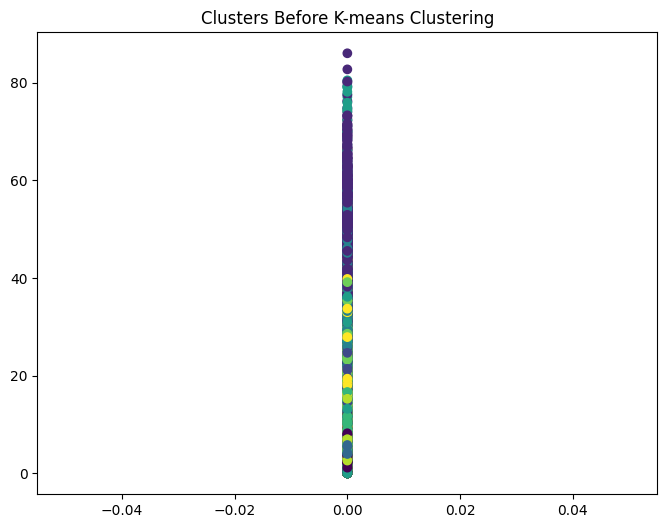

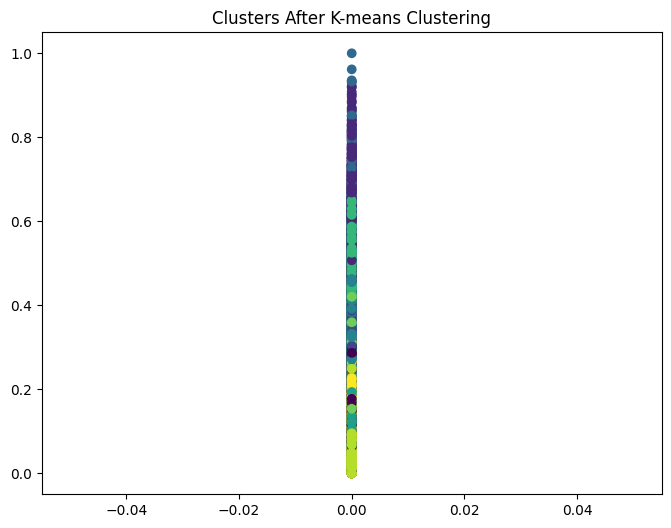

Clustering Metrics:
Homogeneity Score: 0.4398018668198835
Completeness Score: 0.4932945354047168
V-measure Score: 0.4650148838765329
Adjusted Rand Index Score: 0.2563544213110187
Normalized MutualInformation Score: 0.46501488387653284


In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_shape = 784
n_clusters = 10

input_data = Input(shape=(input_shape,))
encoded = Dense(500, activation='relu')(input_data)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(2000, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

autoencoder = Model(input_data, decoded)

clustering_layer = Dense(n_clusters, activation='softmax')(encoded)

model = Model(inputs=input_data, outputs=[clustering_layer, autoencoder.output])

batch_size = 256
epochs = 50
lr = 0.001

model.compile(optimizer=Adam(lr=lr), loss=['kld', 'mse'], loss_weights=[0.1, 1])

model.fit(x_train, [np.zeros((len(x_train), n_clusters)), x_train], batch_size=batch_size, epochs=epochs)

encoder = Model(inputs=model.input, outputs=model.layers[4].output)
encoded_data = encoder.predict(x_train)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_train, cmap='viridis')
plt.title('Clusters Before K-means Clustering')
plt.show()

kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoded_data)

scaler = MinMaxScaler()
encoded_data_scaled = scaler.fit_transform(encoded_data)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_scaled[:, 0], encoded_data_scaled[:, 1], c=y_pred, cmap='viridis')
plt.title('Clusters After K-means Clustering')
plt.show()

print("Clustering Metrics:")
print("Homogeneity Score:", metrics.homogeneity_score(y_train, y_pred))
print("Completeness Score:", metrics.completeness_score(y_train, y_pred))
print("V-measure Score:", metrics.v_measure_score(y_train, y_pred))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_train, y_pred))
print("Normalized Mutual Information Score:", metrics.normalized_mutual_info_score(y_train, y_pred))


/usr/local/lib/python3.8/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0638 - dense_44_loss: -1.1027e-05 - dense_43_loss: 0.0638
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0390 - dense_44_loss: -1.0203e-05 - dense_43_loss: 0.0390
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0323 - dense_44_loss: -1.0491e-05 - dense_43_loss: 0.0323
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0302 - dense_44_loss: -1.1123e-05 - dense_43_loss: 0.0302
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0289 - dense_44_loss: -1.1776e-05 - dense_43_loss: 0.0289
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0280 - dense_44_loss: -1.2380e-05 - dense_43_loss: 0.0280
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0273 - dense_44_loss: -1.2702e-05 - dense_43_loss: 0.0273
Epoch 8/50
235/235 [==============================] - 1s 5ms/s

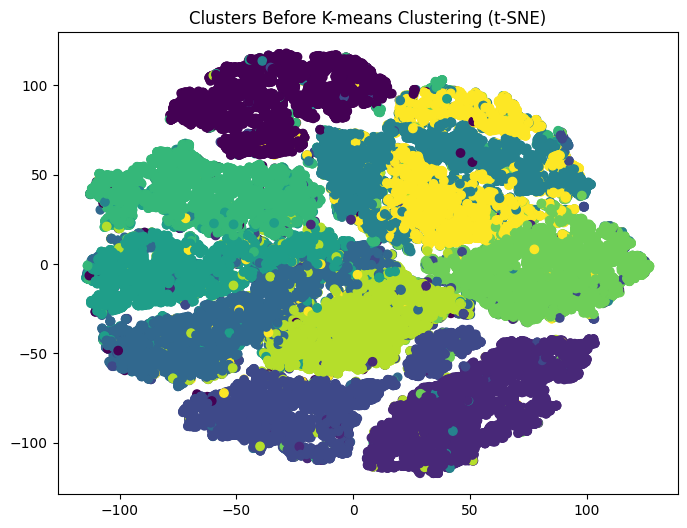

Text(0.5, 1.0, 'Clusters After K-means Clustering (t-SNE)')

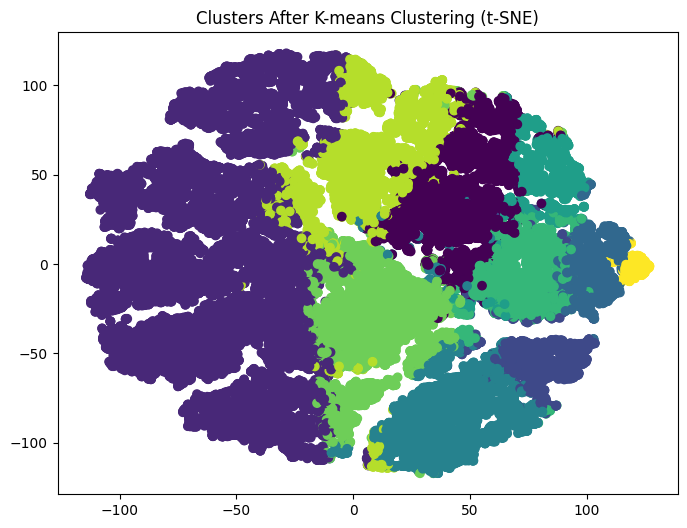

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_shape = 784
n_clusters = 10

input_data = Input(shape=(input_shape,))
encoded = Dense(500, activation='relu')(input_data)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(2000, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

autoencoder = Model(input_data, decoded)

clustering_layer = Dense(n_clusters, activation='softmax')(encoded)

model = Model(inputs=input_data, outputs=[clustering_layer, autoencoder.output])

batch_size = 256
epochs = 50
lr = 0.001

model.compile(optimizer=Adam(lr=lr), loss=['kld', 'mse'], loss_weights=[0.1, 1])

model.fit(x_train, [np.zeros((len(x_train), n_clusters)), x_train], batch_size=batch_size, epochs=epochs)

encoder = Model(inputs=model.input, outputs=model.layers[4].output)
encoded_data = encoder.predict(x_train)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_train, cmap='viridis')
plt.title('Clusters Before K-means Clustering')
plt.show()

kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoded_data)

scaler = MinMaxScaler()
encoded_data_scaled = scaler.fit_transform(encoded_data)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_scaled[:, 0], encoded_data_scaled[:, 1], c=y_pred, cmap='viridis')
plt.title('Clusters After K-means Clustering')
plt.show()

print("Clustering Metrics:")
print("Homogeneity Score:", metrics.homogeneity_score(y_train, y_pred))
print("Completeness Score:", metrics.completeness_score(y_train, y_pred))
print("V-measure Score:", metrics.v_measure_score(y_train, y_pred))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_train, y_pred))
print("Normalized Mutual Information Score:", metrics.normalized_mutual_info_score(y_train, y_pred))


/usr/local/lib/python3.8/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0630 - dense_53_loss: -9.9485e-06 - dense_52_loss: 0.0630
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0368 - dense_53_loss: -1.0131e-05 - dense_52_loss: 0.0368
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0325 - dense_53_loss: -1.1326e-05 - dense_52_loss: 0.0325
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0306 - dense_53_loss: -1.1807e-05 - dense_52_loss: 0.0306
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0292 - dense_53_loss: -1.2263e-05 - dense_52_loss: 0.0292
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0282 - dense_53_loss: -1.2724e-05 - dense_52_loss: 0.0282
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0266 - dense_53_loss: -1.3240e-05 - dense_52_loss: 0.0266
Epoch 8/50
235/235 [==============================] - 1s 5ms/s

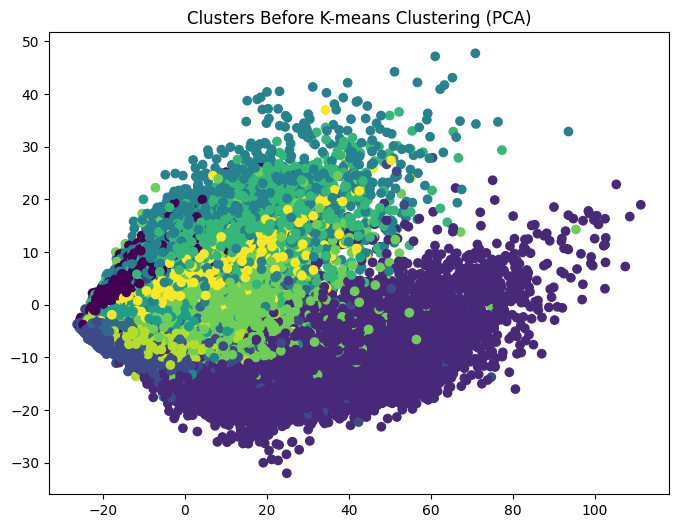

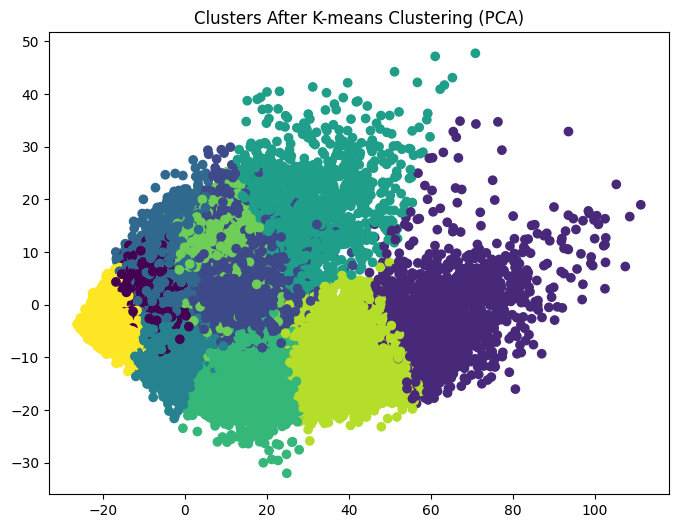

In [7]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define IDEC model
input_shape = 784
n_clusters = 10

# Encoder
input_data = Input(shape=(input_shape,))
encoded = Dense(500, activation='relu')(input_data)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)  # 10-dimensional latent space

# Decoder
decoded = Dense(2000, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_data, decoded)

# Clustering layer
clustering_layer = Dense(n_clusters, activation='softmax')(encoded)

# IDEC model
model = Model(inputs=input_data, outputs=[clustering_layer, autoencoder.output])

# Set hyperparameters
batch_size = 256
epochs = 50
lr = 0.001

# Compile the model
model.compile(optimizer=Adam(lr=lr), loss=['kld', 'mse'], loss_weights=[0.1, 1])

# Pretrain the autoencoder
model.fit(x_train, [np.zeros((len(x_train), n_clusters)), x_train], batch_size=batch_size, epochs=epochs)

# Extract the learned features
encoder = Model(inputs=model.input, outputs=model.layers[4].output)
encoded_data = encoder.predict(x_train)

# Apply PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
encoded_data_2d = pca.fit_transform(encoded_data)

# Visualize clusters before K-means clustering
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_2d[:, 0], encoded_data_2d[:, 1], c=y_train, cmap='viridis')
plt.title('Clusters Before K-means Clustering (PCA)')
plt.show()

# Apply K-means clustering on the learned features
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoded_data)

# Visualize clusters after K-means clustering
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_2d[:, 0], encoded_data_2d[:, 1], c=y_pred, cmap='viridis')
plt.title('Clusters After K-means Clustering (PCA)')
plt.show()


In [8]:
from sklearn.metrics import accuracy_score

def check_similarity(y_true, y_pred):
    similarity = accuracy_score(y_true, y_pred)
    return similarity

In [10]:
print(check_similarity(y_train,y_pred))

0.09201666666666666
